# Project: Titanic

## 目录
<ul>
<li><a href="#intro">提出问题</a></li>
<li><a href="#wrangling">调查数据</a></li>
<li><a href="#eda">探索与分析</a></li>
<li><a href="#conclusions">初步结论</a></li>
</ul>

<a id='intro'></a>
# 1.提出问题

> 问题： 有哪些因素会让船上的人生还率更高？

>对数据集初步了解，猜测有以下因素：

>1.性别

>2.年龄

>3.舱房等级

<a id='wrangling'></a>

# 2. 调查数据

## 2.1 读取数据源

In [2]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

titanic_df = pd.read_csv('titanic-data.csv')

Populating the interactive namespace from numpy and matplotlib


## 2.2 数据整理
### 2.2.1 删除缺失值
>在整理数据前，检查数据的完整性

In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


>本数据中Cabin缺失数据过多，全部不考虑，仅对Age一列进行清理

In [4]:
titanic_df.dropna(subset=['Age'],inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          185 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 58.6+ KB


### 2.2.2 筛选数据
>考虑生还率的相关因素，可能是：

>1.年龄

>2.性别

>3.舱房等级

In [5]:
titanic_key_factors = titanic_df[['Survived', 'Pclass', 'Sex', 'Age']]
titanic_key_factors.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


<a id='eda'></a>
# 3.探索与分析

> 对上述考虑的三种因素分别进行分析：

>1.单因素分析

>2.双因素综合分析

<a id='intro'></a>
## 3.1 单因素分析

### 3.1.1 舱房等级

In [6]:
titanic_pclass = titanic_key_factors[['Survived', 'Pclass']]
groupby_pclass = titanic_pclass.groupby('Pclass') # 按 Pclass 分组
total_groupby_pclass = groupby_pclass.count() # 各 Pclass 的总人数
survived_groupby_pclass = groupby_pclass.sum() # 各 Pclass 的生还数
print total_groupby_pclass.rename(columns={'Survived':'Total'}) 
print ' '
print survived_groupby_pclass
print ' '
survived_rate_pclass = (survived_groupby_pclass/ total_groupby_pclass).rename(columns={'Survived':'Survival Rate'})
print survived_rate_pclass # 各 Pclass 的生还率

        Total
Pclass       
1         186
2         173
3         355
 
        Survived
Pclass          
1            122
2             83
3             85
 
        Survival Rate
Pclass               
1            0.655914
2            0.479769
3            0.239437


Text(0,0.5,u'Survival Rate')

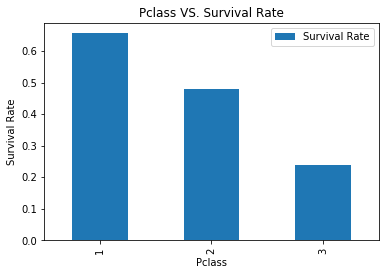

In [7]:
axe_pclass = survived_rate_pclass.plot(kind='bar')
axe_pclass.set_title('Pclass VS. Survival Rate')
axe_pclass.set_ylabel('Survival Rate')

>说明：
一般来说，游轮舱房的设置，Pclass=1 的应该在上层， Pclass=2 的在中层， Pclass=3 在底层则按常理推测，生还率会是按顺序递减，即 生还率(Pclass=1) > 生还率(Pclass=2) > 生还率(Pclass=3) 
从数据结果来看，符合这种递减趋势。可以将舱房等级视为生还的因素之一。

### 3.1.2 性别

In [8]:
titanic_sex = titanic_key_factors[['Survived', 'Sex']]
groupby_sex = titanic_sex.groupby('Sex') # 按性别分组
total_groupby_sex = groupby_sex.count() # 各性别的总数
survived_groupby_sex = groupby_sex.sum() # 各性别的生还数

print total_groupby_sex.rename(columns={'Survived':'Total'})
print ' '
print survived_groupby_sex
print ' '
survive_rate_sex = (survived_groupby_sex / total_groupby_sex).rename(columns={'Survived':'Survival Rate'})
print survive_rate_sex  #各性别的生还率

        Total
Sex          
female    261
male      453
 
        Survived
Sex             
female       197
male          93
 
        Survival Rate
Sex                  
female       0.754789
male         0.205298


Text(0,0.5,u'Survival Rate')

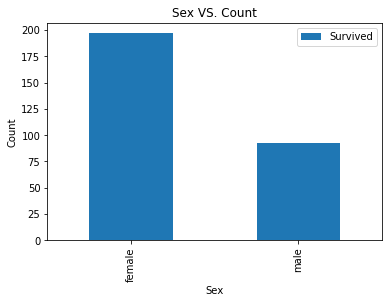

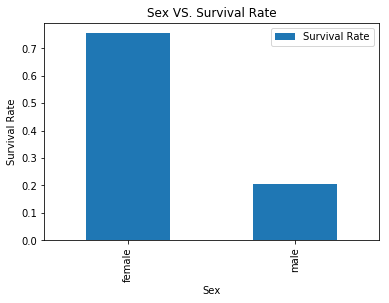

In [9]:
axe1_sex = survived_groupby_sex.plot(kind='bar')  #各性别生还数的柱状图
axe1_sex.set_title('Sex VS. Count')
axe1_sex.set_ylabel('Count')

axe2_sex = survive_rate_sex.plot(kind='bar')   #各性别生还率的柱状图
axe2_sex.set_title('Sex VS. Survival Rate')
axe2_sex.set_ylabel('Survival Rate')

>说明：
 女性生还率接近男性生还率的四倍。女性生还数是男性的两倍以上。
 按常理推测，男性的强壮性比女性高，生存几率应该较大。出现这种情况，有可能是男性协助女性逃生，或者说将生存机会让给女性。

### 3.1.3 年龄

           Dead
age_group      
[0, 10)      35
[10, 20)     51
[20, 30)    100
[30, 40)     68
[40, 50)     44
[50, 60)     21
[60, 70)     13
[70, 80)      2
[80, 90)      1
           Survived
age_group          
[0, 10)          18
[10, 20)         31
[20, 30)         77
[30, 40)         60
[40, 50)         25
[50, 60)         14
[60, 70)          4
[70, 80)          3


Text(0,0.5,u'Count')

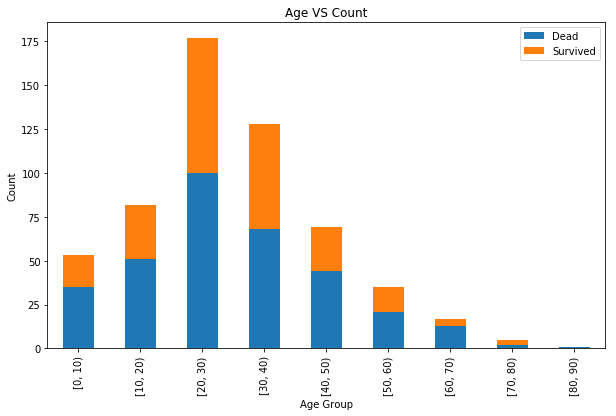

In [10]:
titanic_age = titanic_key_factors[['Survived', 'Age']]

def group_age(age, lim): #将年龄数据 age 分组，按照组距 lim 进行
    if age == 0:
        return 'unknown'
    group = int(age) / lim
    return ('[%d, %d)') % (group*10, group*10+10)


age_group = pd.DataFrame({                                             # 创建年龄分组
    'age_group':[group_age(age, 10) for age in titanic_age.Age]
})

groupby_age = pd.concat([titanic_age['Survived'], age_group], axis=1)
dead_groupby_age = groupby_age[groupby_age.Survived==0].groupby('age_group').count() # 按年龄段分组的死亡数
survived_groupby_age = groupby_age[groupby_age.Survived==1].groupby('age_group').count() # 按年龄段分组的生还数

print dead_groupby_age.rename(columns={'Survived':'Dead'})
print survived_groupby_age

titanic_age_group_count = pd.concat([dead_groupby_age.rename(columns={'Survived':'Dead'}),survived_groupby_age], axis=1)
axe1_age_group = titanic_age_group_count.plot(kind='bar', stacked=True, figsize=(10, 6))
axe1_age_group.set_title('Age VS Count')
axe1_age_group.set_xlabel('Age Group')
axe1_age_group.set_ylabel('Count')

>说明： 
就年龄已知的部分来看，几乎每一组的生还人数都远小于死亡人数。

>生还数量并不能很好地说明问题，以下对生还率与年龄的关系进行分析：

           Survived
age_group          
[0, 10)    0.339623
[10, 20)   0.378049
[20, 30)   0.435028
[30, 40)   0.468750
[40, 50)   0.362319
[50, 60)   0.400000
[60, 70)   0.235294
[70, 80)   0.600000
[80, 90)   0.000000


Text(0,0.5,u'Survival Rate')

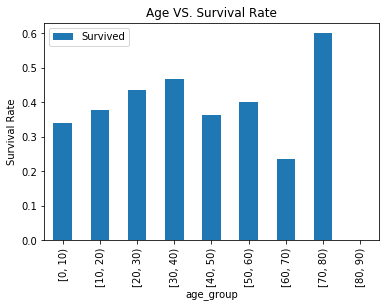

In [11]:
# 直接计算 Survived 的均值，即为生存率
survive_rate_groupby_age = groupby_age.groupby('age_group').mean()

print survive_rate_groupby_age

axe2_age_group = survive_rate_groupby_age.plot(kind='bar')
axe2_age_group.set_title('Age VS. Survival Rate')
axe2_age_group.set_ylabel('Survival Rate')

>说明: 

>就各年龄段的生存率来说，（70-80）这一组老龄人的生存几率最大（超过50%）。
>其它年龄段没有特别明显的差异，均小于50%。最低的是老龄人（60-70），生还率仅有23.53%。

Survived     0
age_group    0
dtype: int64


Text(0.5,1,u'Proportion Of Survival Count in Age Group')

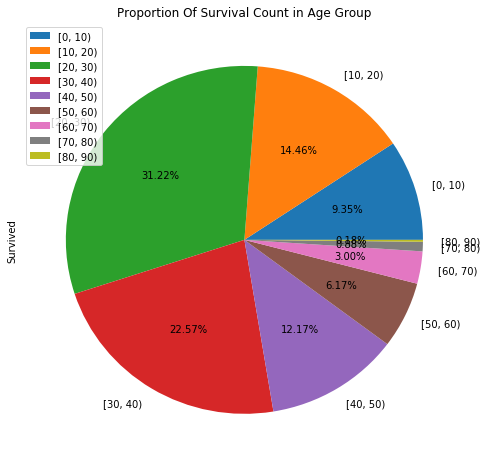

In [13]:
num_unknown = groupby_age[groupby_age.age_group=='unknown'].count()  # 年龄未知的人数
print num_unknown

# 各年龄段的人数占比图
num_total = groupby_age.groupby('age_group').count()
axe3_age_group = num_total.plot(kind='pie', subplots=True, autopct='%.2f%%', figsize=(8, 8))[0]
axe3_age_group.set_title('Proportion Of Survival Count in Age Group')

>说明: 

>由于年龄未知的人数较多（177人，占总体19.87%），对上述生还率与年龄关系的判断可能存在较大影响。

<a id='intro'></a>
## 3.2 双因素分析

### 3.2.1 舱房等级&性别

Text(0,0.5,u'Survival Rate')

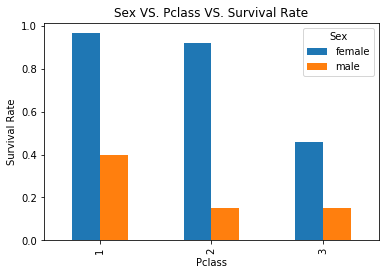

In [14]:
axe_pclass_sex_rate = titanic_key_factors.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack().plot(kind='bar')
axe_pclass_sex_rate.set_title('Sex VS. Pclass VS. Survival Rate')
axe_pclass_sex_rate.set_ylabel('Survival Rate')

Text(0,0.5,u'Survival Rate')

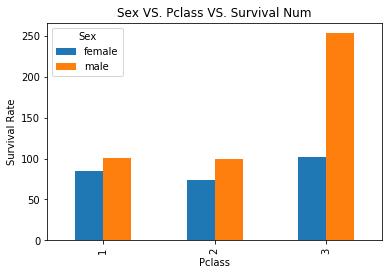

In [15]:
axe_pclass_sex_num = titanic_key_factors.groupby(['Pclass', 'Sex'])['Survived'].count().unstack().plot(kind='bar')
axe_pclass_sex_num.set_title('Sex VS. Pclass VS. Survival Num')
axe_pclass_sex_num.set_ylabel('Survival Rate')

### >说明： 

>从上图可以得知，不管是男性还是女性，生还率随着舱房等级的提高而增大。从组内人数来看，3等舱存活的男性却要高于其他组别。

### 3.2.2 性别&年龄

C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Text(0,0.5,u'Survival Rate')

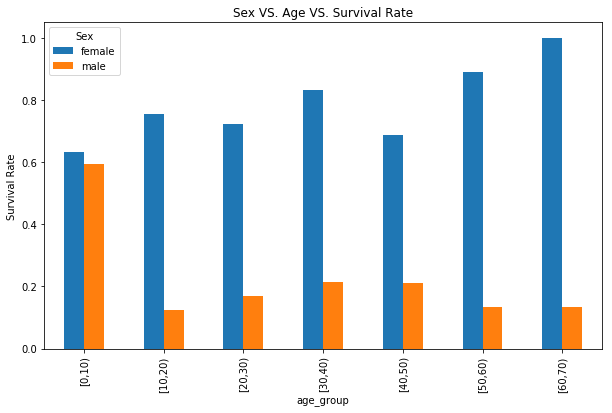

In [16]:
# Pandas 的 cut() 方法，用于分组聚集
bins = np.arange(0, 80, 10)
#titanic_key_factors_new = pd.concat([titanic_key_factors, pd.cut(titanic_df['Age'], bins, right=False)], axis=1)
#titanic_key_factors_new

age_group_names = ['[0,10)', '[10,20)', '[20,30)', '[30,40)', '[40,50)', '[50,60)', '[60,70)']
titanic_key_factors['age_group'] = pd.cut(titanic_df['Age'], bins, labels=age_group_names, right=False)
axe_age_sex_rate = titanic_key_factors.groupby(['age_group', 'Sex'])['Survived'].mean().unstack().plot(kind='bar', figsize=(10, 6))
axe_age_sex_rate.set_title('Sex VS. Age VS. Survival Rate')
axe_age_sex_rate.set_ylabel('Survival Rate')

Text(0,0.5,u'Survival Num')

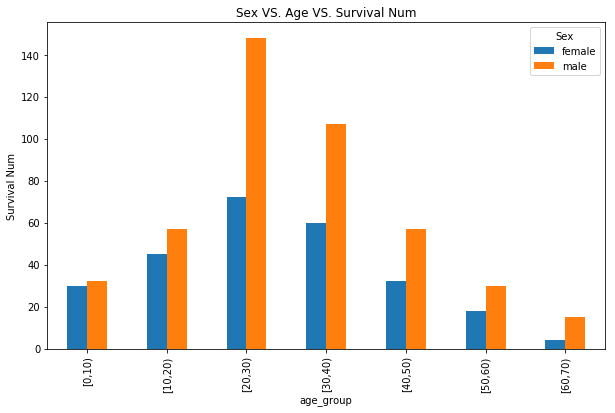

In [17]:
axe_age_sex_num = titanic_key_factors.groupby(['age_group', 'Sex'])['Survived'].count().unstack().plot(kind='bar', figsize=(10, 6))
axe_age_sex_num.set_title('Sex VS. Age VS. Survival Num')
axe_age_sex_num.set_ylabel('Survival Num')

### 3.2.2 舱房等级&年龄

Text(0,0.5,u'Survival Rate')

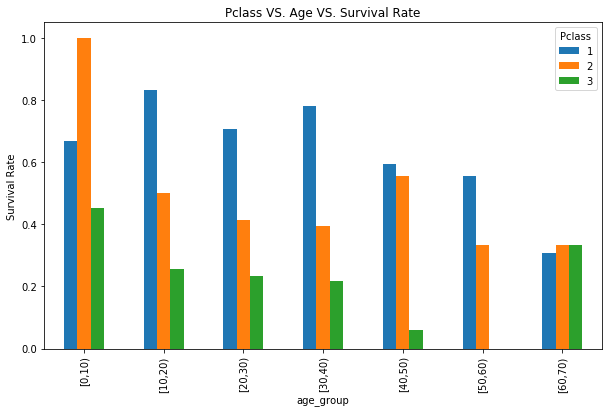

In [18]:
axe_age_pclass_rate = titanic_key_factors.groupby(['age_group', 'Pclass'])['Survived'].mean().unstack().plot(kind='bar', figsize=(10, 6))
axe_age_pclass_rate.set_title('Pclass VS. Age VS. Survival Rate')
axe_age_pclass_rate.set_ylabel('Survival Rate')

Text(0,0.5,u'Survival Num')

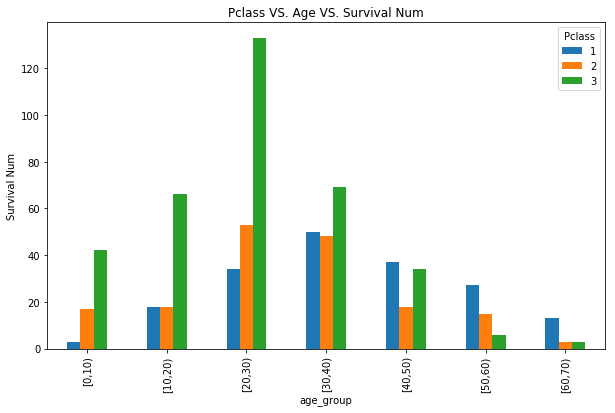

In [19]:
axe_age_pclass_num = titanic_key_factors.groupby(['age_group', 'Pclass'])['Survived'].count().unstack().plot(kind='bar', figsize=(10, 6))
axe_age_pclass_num.set_title('Pclass VS. Age VS. Survival Num')
axe_age_pclass_num.set_ylabel('Survival Num')

>由上图可得出：

>1.总体上来说，生还率随着舱房等级的提高而增大
>2.虽然生还率随着舱房等级的提高而增大，但(0,10](10,20](20,30](30,40]这几个年龄段中，3等舱的生还人数高于1等舱的生还人数，这很大可能是因为这几个年龄段中，在1等舱的人数较少。

>3.分析年龄两端数据 

>无论舱房等级，老年人（60岁以上）的生还率很接近（但生还率均比较低）

>对于儿童（10岁以下），Pclass=2的比Pclass=1高，有点偏离规律，下面进一步分析


In [20]:
titanic_key_factors[(titanic_key_factors['age_group'] == '[0,10)') & (titanic_key_factors['Pclass'] == 1)]

,Survived,Pclass,Sex,Age,age_group
297,0,1,female,2.00,"[0,10)"
305,1,1,male,0.92,"[0,10)"
445,1,1,male,4.00,"[0,10)"


In [21]:
titanic_key_factors[(titanic_key_factors['age_group'] == '[0,10)') & (titanic_key_factors['Pclass'] == 2)]

,Survived,Pclass,Sex,Age,age_group
43,1,2,female,3.00,"[0,10)"
58,1,2,female,5.00,"[0,10)"
78,1,2,male,0.83,"[0,10)"
183,1,2,male,1.00,"[0,10)"
193,1,2,male,3.00,"[0,10)"
237,1,2,female,8.00,"[0,10)"
340,1,2,male,2.00,"[0,10)"
407,1,2,male,3.00,"[0,10)"
530,1,2,female,2.00,"[0,10)"
535,1,2,female,7.00,"[0,10)"


>从上述表格得知：

>1.10岁以下儿童中，Pclass=1只有三位，而其中一位没有生还，从而导致生还率偏低（相对于Pclass=2来说）

>2.合理猜测是由于某些意外，这位年龄小的儿童未能生还。

>3.上述的第一点结论，还是较符合实际的。

<a id='intro'></a>
## 3.3 分析小结

>从上述分析结果来看，可得出以下几个结论：

>1.舱房等级越高，则生还率越高，不论年龄、性别

>2.不论年龄、舱房等级，女性生还率最高

>3.儿童的还率较高，与性别、舱房等级无关

<a id='conclusions'></a>
# 4.初步结论

>通过对泰坦尼克号上 2224 名乘客和船员中 891 名的人口学数据和乘客基本信息的分析，对于问题“有哪些因素会让船上的人生还率更高？”得出以下初步结论：

>1.舱房等级、性别、年龄是影响生还率的因素

>2.住高等级舱房的女性，其生还率是最高的；其次则为儿童（与性别、舱房等级无关）

>然而，由于不清楚样本是否随机选取、样本量不大，且样本数据中存在信息缺失，初步结论并无法表明这三个因素与“生还率”具有相关性。